In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('heart (1).csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df['target'].unique()

array([1, 0])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.isnull().sum().sum()

np.int64(0)

In [8]:
df.duplicated().sum()

np.int64(1)

In [9]:
# delete the duplicate row from dataset
df = df.drop_duplicates()

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
corr = df.corr()

<Axes: >

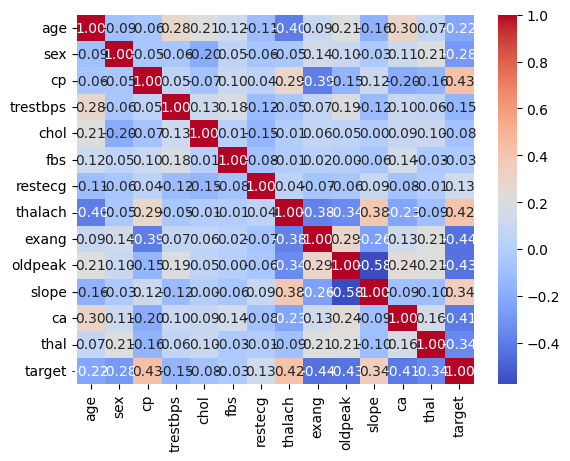

In [12]:
sns.heatmap(corr,annot=True,cmap="coolwarm", fmt=".2f")

In [13]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

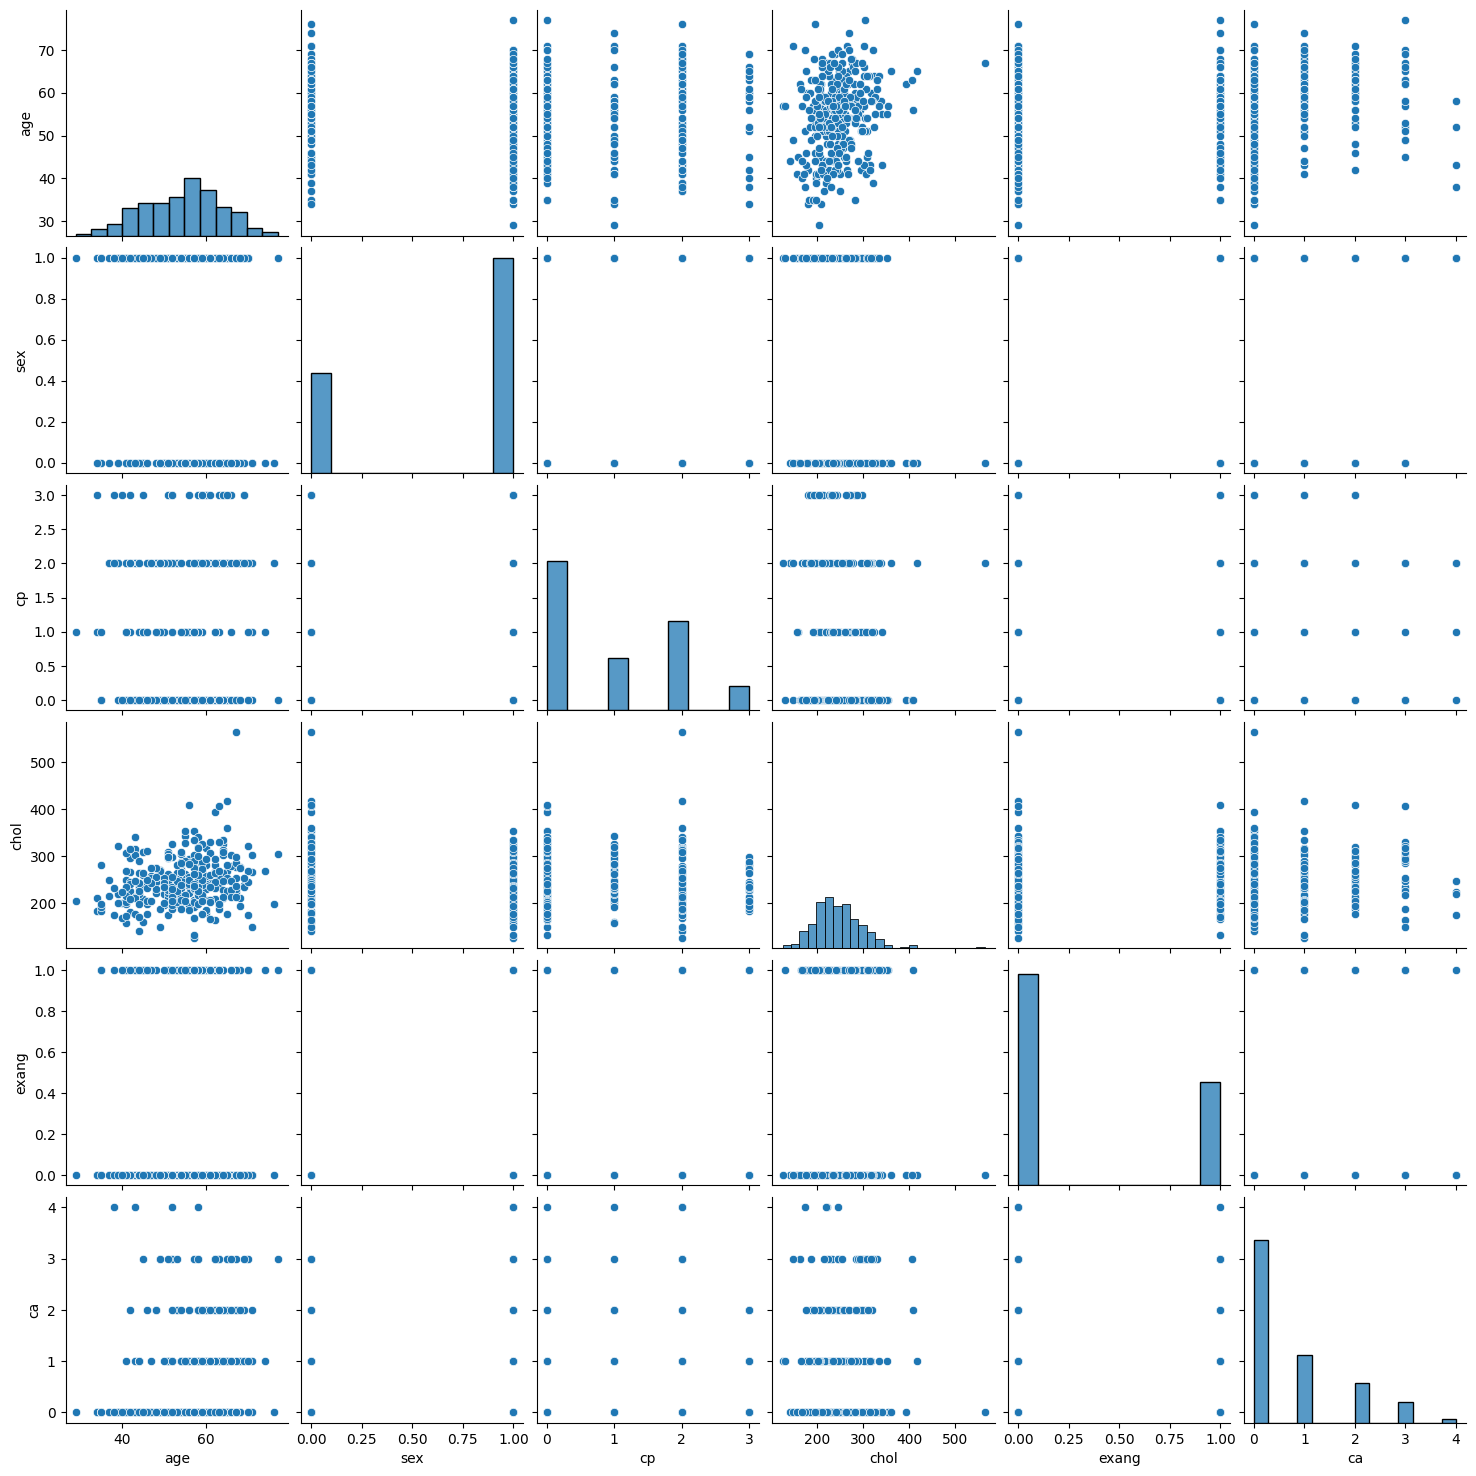

In [14]:
sns.pairplot(df, vars=['age','sex','cp','chol','exang','ca'])

<Axes: xlabel='chol', ylabel='Count'>

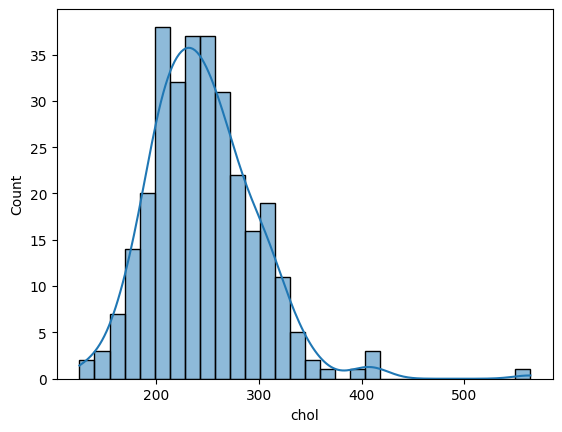

In [15]:
sns.histplot(df['chol'], bins=30, kde=True) 

In [16]:
# removing outlier
Q1 = df['chol'].quantile(0.25)
Q3 = df['chol'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['chol'] < lower_bound) | (df['chol'] > upper_bound)]
print(outliers)


     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
28    65    0   2       140   417    1        0      157      0      0.8   
85    67    0   2       115   564    0        0      160      0      1.6   
96    62    0   0       140   394    0        0      157      0      1.2   
220   63    0   0       150   407    0        0      154      0      4.0   
246   56    0   0       134   409    0        0      150      1      1.9   

     slope  ca  thal  target  
28       2   1     2       1  
85       1   0     3       1  
96       1   0     2       1  
220      1   3     3       0  
246      1   2     3       0  


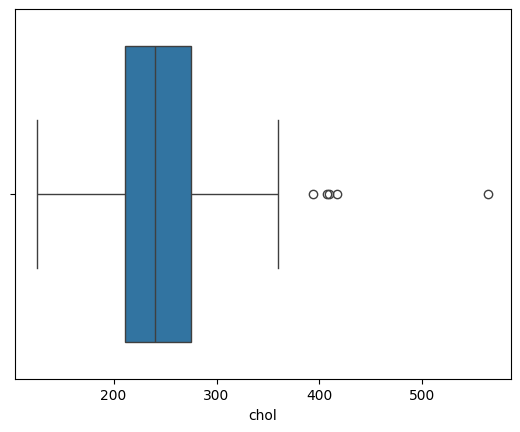

In [17]:
sns.boxplot(x=df['chol'])
plt.show()

In [18]:
df_clean = df[(df['chol'] >= lower_bound) & (df['chol'] <= upper_bound)]


<Axes: xlabel='chol', ylabel='Count'>

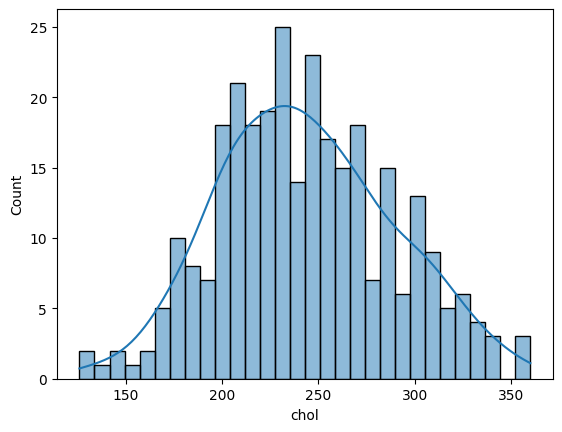

In [19]:
sns.histplot(df_clean['chol'], bins=30, kde=True) 

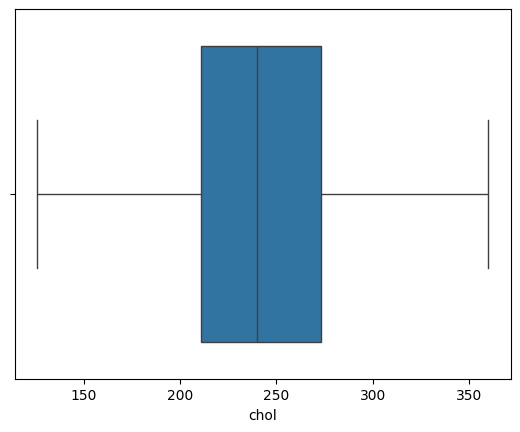

In [20]:
sns.boxplot(x=df_clean['chol'])
plt.show()

In [21]:
df_clean.isnull().sum().sum()

np.int64(0)

In [22]:
df_clean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
x = df_clean[['age','sex','cp','chol','exang','ca']]
y = df_clean['target']

In [24]:
x

,age,sex,cp,chol,exang,ca
0,63,1,3,233,0,0
1,37,1,2,250,0,0
2,41,0,1,204,0,0
3,56,1,1,236,0,0
4,57,0,0,354,1,0
...,...,...,...,...,...,...
298,57,0,0,241,1,0
299,45,1,3,264,0,0
300,68,1,0,193,0,2
301,57,1,0,131,1,1


In [25]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 297, dtype: int64

In [26]:
y.unique()

array([1, 0])

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [30]:
# random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model_rfr= RandomForestClassifier(n_estimators=100, random_state=42)
model_rfr.fit(x_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [31]:
rfr_pred = model_rfr.predict(x_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rfr_pred))
print("\nClassification Report:\n", classification_report(y_test, rfr_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rfr_pred))


Random Forest Accuracy: 0.7166666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.69      0.68        26
           1       0.76      0.74      0.75        34

    accuracy                           0.72        60
   macro avg       0.71      0.71      0.71        60
weighted avg       0.72      0.72      0.72        60


Confusion Matrix:
 [[18  8]
 [ 9 25]]


In [32]:
# logistict regressor
from sklearn.linear_model import LogisticRegression

In [33]:
model_lr = LogisticRegression()
model_lr.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [34]:
lr_pred = model_lr.predict(x_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("\nClassification Report:\n", classification_report(y_test, lr_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, lr_pred))


Logistic Regression Accuracy: 0.7833333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.73      0.75        26
           1       0.80      0.82      0.81        34

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60


Confusion Matrix:
 [[19  7]
 [ 6 28]]


In [35]:
# svm 
from sklearn.svm import SVC

In [36]:
model_svm = SVC(kernel ='rbf')
model_svm.fit(x_train,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [37]:
svm_pred = model_svm.predict(x_test)

print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("\nClassification Report:\n", classification_report(y_test, svm_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, svm_pred))


SVM Accuracy: 0.5833333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.19      0.29        26
           1       0.59      0.88      0.71        34

    accuracy                           0.58        60
   macro avg       0.57      0.54      0.50        60
weighted avg       0.57      0.58      0.52        60


Confusion Matrix:
 [[ 5 21]
 [ 4 30]]


In [38]:
# decision tree
from sklearn.tree import DecisionTreeClassifier

In [39]:
model_dt = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42)
model_dt.fit(x_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [40]:
dt_pred = model_dt.predict(x_test)

print("Desion Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("\nClassification Report:\n", classification_report(y_test, dt_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, dt_pred))


Desion Tree Accuracy: 0.6166666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.65      0.60        26
           1       0.69      0.59      0.63        34

    accuracy                           0.62        60
   macro avg       0.62      0.62      0.62        60
weighted avg       0.63      0.62      0.62        60


Confusion Matrix:
 [[17  9]
 [14 20]]


In [41]:
# linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
model_linrg = LinearRegression()
model_linrg.fit(x_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [43]:
linrg_pred = model_linrg.predict(x_test)

print("MSE:", mean_squared_error(y_test,linrg_pred))
print("R2 Score:", r2_score(y_test, linrg_pred))


MSE: 0.17034142865518828
R2 Score: 0.3063018742548893


In [44]:
# naive bayes
from sklearn.naive_bayes import GaussianNB

In [45]:
model_nb = GaussianNB()
model_nb.fit(x_train, y_train)

,priors,None
,var_smoothing,1e-09


In [46]:
nb_pred = model_nb.predict(x_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print("\nClassification Report:\n", classification_report(y_test, nb_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, nb_pred))


Naive Bayes Accuracy: 0.7666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.73      0.73        26
           1       0.79      0.79      0.79        34

    accuracy                           0.77        60
   macro avg       0.76      0.76      0.76        60
weighted avg       0.77      0.77      0.77        60


Confusion Matrix:
 [[19  7]
 [ 7 27]]


# tuning

In [47]:
from sklearn.model_selection import GridSearchCV


In [48]:

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'max_features': ['auto', 'sqrt']
}

In [49]:

rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_rf.fit(x_train, y_train)

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [None, 5, ...], 'max_features': ['auto', 'sqrt'], 'n_estimators': [100, 200, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [50]:
print("Best RF params:", grid_rf.best_params_)
print("Best RF accuracy:", grid_rf.best_score_)

Best RF params: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}
Best RF accuracy: 0.8307624113475178


In [51]:

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear']
}

In [52]:

svc = SVC()
grid_svm = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid_svm.fit(x_train_scaled, y_train)

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': ['scale', 0.01, ...], 'kernel': ['rbf', 'linear']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,10


In [53]:
print("Best SVM params:", grid_svm.best_params_)
print("Best SVM accuracy:", grid_svm.best_score_)


Best SVM params: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best SVM accuracy: 0.8564716312056737


In [54]:
param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l2'], 'solver': ['lbfgs']}

In [55]:
grid_lr = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_lr.fit(x_train_scaled, y_train)

,estimator,LogisticRegression()
,param_grid,"{'C': [0.1, 1, ...], 'penalty': ['l2'], 'solver': ['lbfgs']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [56]:
print("Best LR params:", grid_lr.best_params_)
print("Best LR accuracy:", grid_lr.best_score_)


Best LR params: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best LR accuracy: 0.7928191489361702


In [57]:
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}




In [58]:
gnb = GaussianNB()
grid_gnb = GridSearchCV(gnb, param_grid, cv=5, scoring='accuracy')
grid_gnb.fit(x_train, y_train)


,estimator,GaussianNB()
,param_grid,"{'var_smoothing': [1e-09, 1e-08, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,priors,None


In [59]:

print("Best GaussianNB params:", grid_gnb.best_params_)
print("Best GaussianNB accuracy:", grid_gnb.best_score_)

Best GaussianNB params: {'var_smoothing': 1e-09}
Best GaussianNB accuracy: 0.7929078014184398


In [60]:
# random search grid
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [61]:
param_dist = {
    'n_estimators': randint(100, 500),      # number of trees
    'max_depth': randint(3, 20),            # max depth of tree
    'min_samples_split': randint(2, 10),    # min samples to split node
    'min_samples_leaf': randint(1, 5),      # min samples at leaf
    'max_features': ['auto', 'sqrt', 'log2']
}

In [62]:
# Randomized Search
random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist,
    n_iter=50,           # number of random combinations to try
    cv=5,                # 5-fold cross-validation
    scoring='accuracy',
    random_state=42,
    n_jobs=-1            # use all cores
)

In [63]:
random_search.fit(x_train, y_train)

,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'max_depth': <scipy.stats....0019483032F00>, 'max_features': ['auto', 'sqrt', ...], 'min_samples_leaf': <scipy.stats....0019483231400>, 'min_samples_split': <scipy.stats....0019483231670>, ...}"
,n_iter,50
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [64]:
print("Best params:", random_search.best_params_)
print(" Random Forest Best CV accuracy:", random_search.best_score_)


Best params: {'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 476}
 Random Forest Best CV accuracy: 0.8351063829787233


In [65]:
rf_pred = random_search.best_estimator_.predict(x_test_scaled)
from sklearn.metrics import accuracy_score, classification_report
print("Test Accuracy:", accuracy_score(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))

Test Accuracy: 0.7
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.77      0.69        26
           1       0.79      0.65      0.71        34

    accuracy                           0.70        60
   macro avg       0.71      0.71      0.70        60
weighted avg       0.72      0.70      0.70        60



In [66]:
from scipy.stats import uniform


In [67]:
param_dist = {
    'C': uniform(0.1, 10),        # range from 0.1 to 10
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}


In [68]:
svc = SVC()

# Randomized Search
random_search = RandomizedSearchCV(
    svc, param_distributions=param_dist,
    n_iter=20,           # number of random combinations to try
    cv=5,                # 5-fold cross-validation
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

In [69]:
random_search.fit(x_train_scaled, y_train)

,estimator,SVC()
,param_distributions,"{'C': <scipy.stats....0019483214200>, 'gamma': ['scale', 'auto', ...], 'kernel': ['rbf', 'linear', ...]}"
,n_iter,20
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [70]:
print("Best SVM params:", random_search.best_params_)
print(" s=SVM Best CV accuracy:", random_search.best_score_)

Best SVM params: {'C': np.float64(7.41993941811405), 'gamma': 1, 'kernel': 'rbf'}
 s=SVM Best CV accuracy: 0.8307624113475178


In [71]:
y_pred = random_search.best_estimator_.predict(x_test_scaled)
from sklearn.metrics import accuracy_score, classification_report
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.6666666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.62      0.62        26
           1       0.71      0.71      0.71        34

    accuracy                           0.67        60
   macro avg       0.66      0.66      0.66        60
weighted avg       0.67      0.67      0.67        60



In [73]:
import joblib
joblib.dump(random_search,"model_heart.pkl")

['model_heart.pkl']